In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from yellowbrick.text import FreqDistVisualizer
from datetime import datetime, timedelta

In [2]:
df_fake = pd.read_csv("data/raw/Fake.csv")
df_fake, df_fake_test = train_test_split(df_fake, test_size=0.2, random_state=123)
df_true = pd.read_csv("data/raw/True.csv")
df_true, df_true_test = train_test_split(df_true, test_size=0.2, random_state=123)
clean_df = pd.read_csv("data/processed/all_news.csv")
clean_df, clean_df_test = train_test_split(clean_df, test_size=0.2, random_state=123)

In [3]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18784 entries, 11545 to 19966
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    18784 non-null  object
 1   text     18784 non-null  object
 2   subject  18784 non-null  object
 3   date     18784 non-null  object
dtypes: object(4)
memory usage: 733.8+ KB


In [4]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17133 entries, 6226 to 19966
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    17133 non-null  object
 1   text     17133 non-null  object
 2   subject  17133 non-null  object
 3   date     17133 non-null  object
dtypes: object(4)
memory usage: 669.3+ KB


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35413 entries, 24080 to 15725
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35413 non-null  object
 1   text     35413 non-null  object
 2   subject  35413 non-null  object
 3   date     35403 non-null  object
 4   label    35413 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


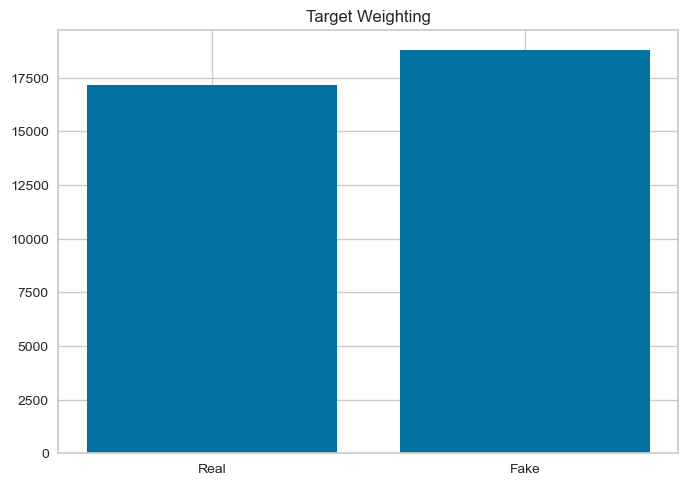

In [6]:
class_df = pd.DataFrame({"Real": [len(df_true)], "Fake": [len(df_fake)]}, index = ["Count"])
class_df

plt.title('Target Weighting')
plt.bar(class_df.columns,class_df.loc["Count"])
plt.show()

In [7]:
#Count of topics in each Data Frame from Raw files
subject_df = pd.DataFrame()

all_df = [df_fake, df_true]

for df in all_df:
    counts_df = pd.DataFrame(df["subject"].value_counts().reset_index())
    subject_df = pd.concat([subject_df, counts_df], axis =1)

subject_df.columns = ["Fake Subjects", "Count of Each Subject", "Real Subjects", "Count of Each Subject"]
subject_df

,Fake Subjects,Count of Each Subject,Real Subjects,Count of Each Subject
0,News,7268,politicsNews,9018.0
1,politics,5452,worldnews,8115.0
2,left-news,3578,NaN,NaN
3,Government News,1248,NaN,NaN
4,US_News,619,NaN,NaN
5,Middle-east,619,NaN,NaN


In [8]:
#Count of topics in processed data files
subject_counts_clean_df = pd.DataFrame(clean_df.groupby(by=["label"])["subject"].value_counts())
subject_counts_clean_df = subject_counts_clean_df.rename(columns = {'subject':'Count'})
subject_counts_clean_df.index.names = ['Target','Subject']
subject_counts_clean_df

Count
Target Subject            
fake   other         10625
       politicsNews   6935
       worldnews       604
real   politicsNews   9120
       worldnews      8129

In [10]:
#Finding text length (word counts) in raw file and clean data file
data_dic = {'Average word count': [],
        'Shortest word length': [],
        'Longest word length': []}

all_df = [clean_df, df_fake, df_true]
column = "title"

for df in all_df:
    data_dic['Average word count'].append(df[column].str.len().mean().round())
    data_dic['Shortest word length'].append(df[column].str.len().min())
    data_dic['Longest word length'].append(df[column].str.len().max().max())

word_count_df = pd.DataFrame(data_dic, index = ['All clean text', 'Fake Text', 'True Text'])
word_count_df

,Average word count,Shortest word length,Longest word length
All clean text,80.0,8,286
Fake Text,94.0,8,286
True Text,65.0,26,133


In [11]:
df_fake.query("subject == 'Government News'")

,title,text,subject,date
17301,AFGHAN INTERPRETER FOR US MURDERED BY TALIBAN ...,I was always loyal to U.S.A and never betray ...,Government News,"May 30, 2015"
16577,COMMIE CALIFORNIA BILL Would Allow Prosecution...,How can you be prosecuted for something that i...,Government News,"Jun 4, 2016"
16288,PRESIDENT-ELECT TRUMP’S INAUGURAL COMMITTEE An...,"Today, the Presidential Inaugural Committee (P...",Government News,"Dec 21, 2016"
17211,TOP DEMOCRAT ACTIVIST WHO LAUNCHED ONLINE CAMP...,"CJ Pearson, the 12 year old conservative socia...",Government News,"Jul 9, 2015"
16219,CRYBABY DEM WOMEN Stay Seated When Trump Enter...,,Government News,"Feb 28, 2017"
...,...,...,...,...
16140,SHOCKING! HERE’S HOW OFTEN Airlines Bump Passe...,Who knew that the Department of Transportation...,Government News,"Apr 11, 2017"
17334,HILLARY 2016 FAN JAMES TAYLOR: “Every day that...,Time to exhale James Barack Obama supporter Ja...,Government News,"May 16, 2015"
17221,“GREXIT”? GREEKS VOTE NO ON MORE AUSTERITY IN ...,"A number of European politicians, including J...",Government News,"Jul 5, 2015"
16972,FORMER CIA AGENT SAYS OBAMA WORKING WITH MUSLI...,"Former CIA Agent, Clare Lopez has been ringing...",Government News,"Nov 13, 2015"


In [12]:
clean_df

,title,text,subject,date,label
24080,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,other,2017-02-06,fake
18919,Iraqi PM calls on Kurds to cancel independence...,Iraq s Prime Minister Haider al-Abadi demande...,worldnews,2017-09-27,real
20596,French minister calls out Trump on climate cha...,French Environment Minister Nicolas Hulot sai...,worldnews,2017-09-08,real
4011,Exclusive: Trump vows to fix or scrap South Ko...,U.S. President Donald Trump told Reuters on T...,politicsNews,2017-04-28,real
26930,Dallas Police Chief Tells Congress To Shove T...,"It started out as an observation, then it turn...",other,2016-07-11,fake
...,...,...,...,...,...
7763,North Carolina offers reward in arson at local...,"North Carolina will pay up to $5,000 for tips...",politicsNews,2016-10-19,real
15377,"Zimbabwe's axed VP is safe, traveling to South...",Zimbabwe s former vice president Emmerson Mna...,worldnews,2017-11-08,real
17730,France calls for Catalonia discussions within ...,France on Wednesday reiterated a call for the...,worldnews,2017-10-11,real
28030,WATCH: President Obama’s ‘Couch Commander’ Co...,For his final White House Correspondent s Dinn...,other,2016-04-30,fake


In [19]:
#Generate two dataframes of fake and real news from processed clean_data
fake_df = clean_df.query("label == 'fake'")
real_df = clean_df.query("label == 'real'")

In [20]:
# Create list of words in title
fake_news = " ".join(fake_df ["text"].tolist())
true_news = " ".join(real_df["text"].tolist())

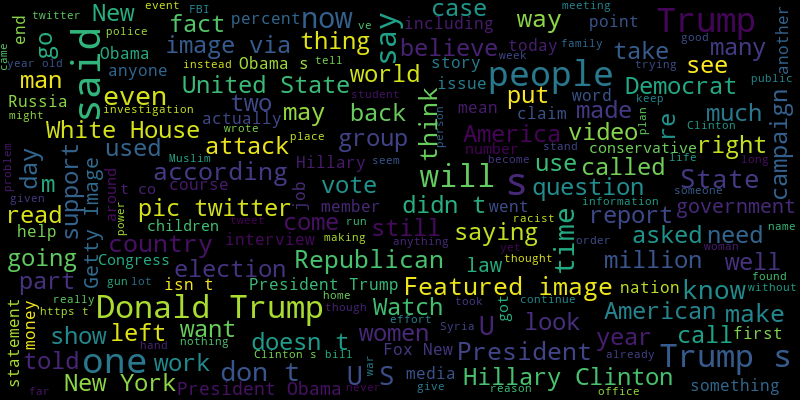

In [15]:
# Word cloud for titles in fake news
wordcloud = WordCloud(max_font_size=40, width=800, height=400)
wordcloud.generate(fake_news).to_image()

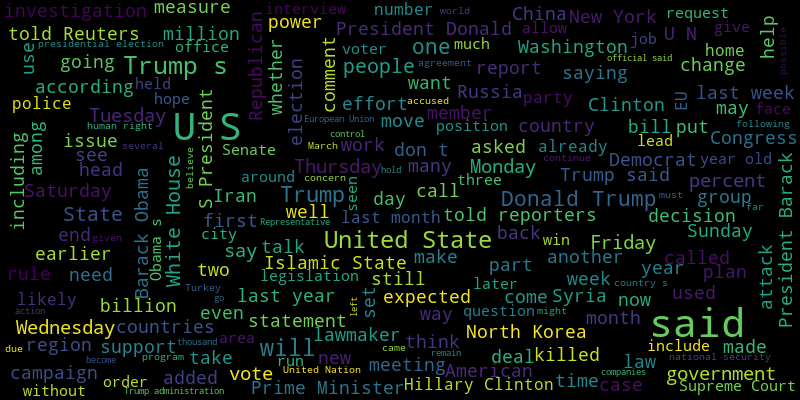

In [21]:
# Word cloud for titles in real news
wordcloud = WordCloud(max_font_size=40, width=800, height=400)
wordcloud.generate(true_news).to_image()

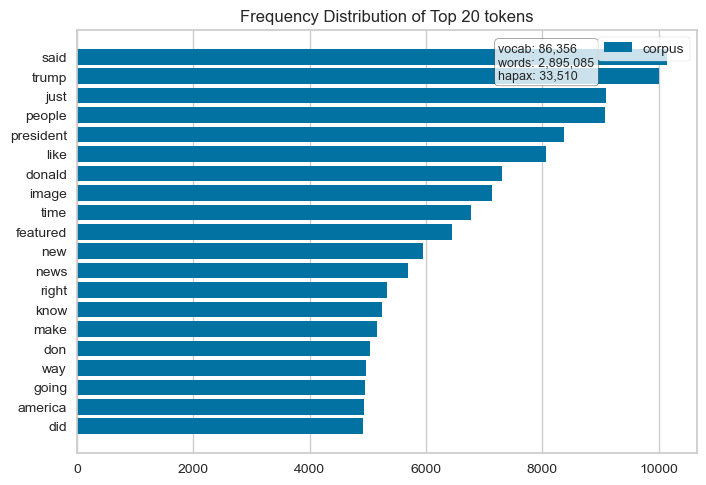

In [22]:
#Generate Count Vectorizer for Fake news text
countvec_fake = CountVectorizer(binary=True, stop_words='english')
fake_train_vec = countvec_fake.fit_transform(fake_df['text'])
fake_features = countvec_fake.get_feature_names_out()

#Display highest frequency words in Fake text
visualizer = FreqDistVisualizer(features=fake_features, n=20)
visualizer.fit(fake_train_vec)
visualizer.show();

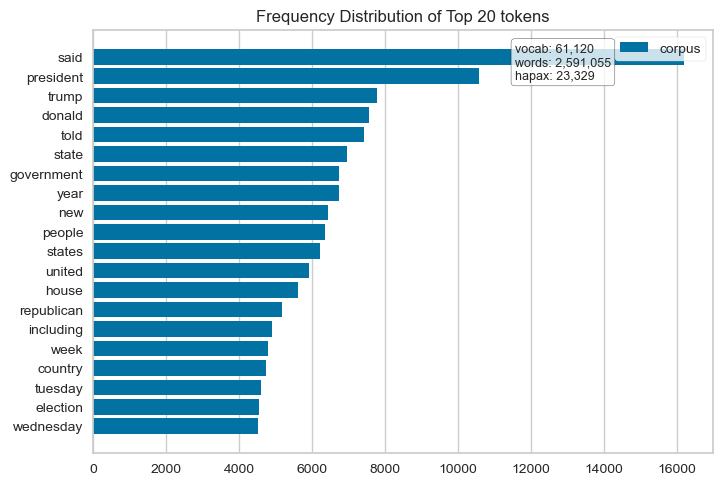

In [ ]:
#Generate Count Vectorizer for Real news text
countvec_real = CountVectorizer(binary=True, stop_words='english')
real_train_vec = countvec_fake.fit_transform(real_df['text'])
real_features = countvec_fake.get_feature_names_out()

#Display highest frequency words in real news text
visualizer = FreqDistVisualizer(features=real_features, n=20)
visualizer.fit(real_train_vec)
visualizer.show();

In [92]:
#Convert date field to date index in real_df
real_date = pd.to_datetime(real_df["date"])
real_df.index = pd.Index(real_date)

#Count monthly frequency of articles in fake_df
real_df_freq = real_df.resample("M").count()
#fake_df_freq["date"] = fake_df_freq.index

In [89]:
#Convert date field to date index in fake_df
fake_date = pd.to_datetime(fake_df["date"])
fake_df.index = pd.Index(fake_date)

#Count monthly frequency of articles in fake_df
fake_df_freq = fake_df.resample("M").count()
#fake_df_freq["date"] = fake_df_freq.index

fake_df_freq


,title,text,subject,date,label
date,,,,,
2015-03-31,6,6,6,6,6
2015-04-30,249,249,249,249,249
2015-05-31,244,244,244,244,244
2015-06-30,188,188,188,188,188
2015-07-31,233,233,233,233,233
2015-08-31,170,170,170,170,170
2015-09-30,162,162,162,162,162
2015-10-31,218,218,218,218,218
2015-11-30,209,209,209,209,209


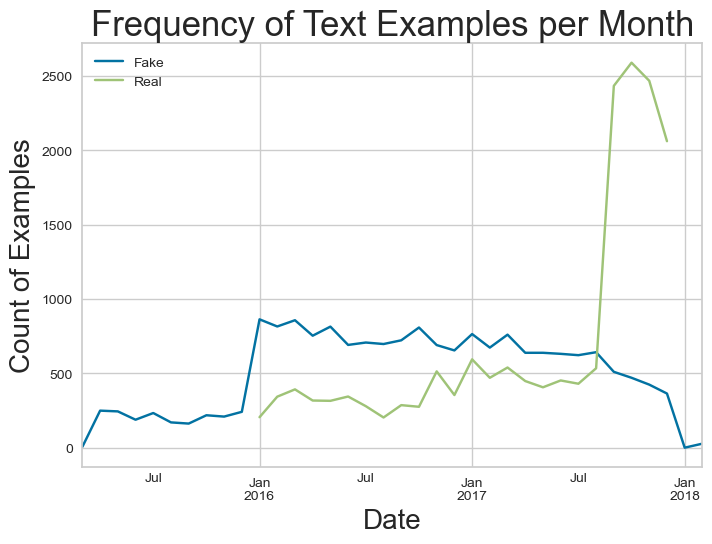

In [97]:
#Plot Date and Frequency count of examples per month
fake_df_freq["text"].plot()
real_df_freq["text"].plot()
plt.xlabel("Date",  size = 20)
plt.ylabel("Count of Examples", size = 20)
plt.title("Frequency of Text Examples per Month", size = 25)
plt.legend(["Fake", "Real"])